In [8]:
import pandas as pd

# Original dataset visualization

## Parameters

In [9]:
original_dataset_path = '/Users/adrienbousquie/Documents/EPFL/ComProject/SAGA_COM-304/.local_cache/vggsound.csv'

## Statistics

In [10]:
original_dataset = pd.read_csv(original_dataset_path)
original_dataset.head()

,video_clip_name,timestamp,class,group_name
0,---g-f_I2yQ,1,people marching,test
1,--0PQM4-hqg,30,waterfall burbling,train
2,--56QUhyDQM,185,playing tennis,train
3,--5OkAjCI7g,40,people belly laughing,train
4,--8puiAGLhs,30,car engine starting,train


In [4]:
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199467 entries, 0 to 199466
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   video_clip_name  199467 non-null  object
 1   timestamp        199467 non-null  int64 
 2   class            199467 non-null  object
 3   group_name       199467 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.1+ MB


In [5]:
print("Classes distribution")
original_dataset['class'].value_counts().reset_index()

Classes distribution


,class,count
0,fireworks banging,1050
1,tap dancing,1050
2,"motorboat, speedboat acceleration",1050
3,playing trombone,1050
4,playing drum kit,1050
...,...,...
305,snake rattling,199
306,zebra braying,199
307,playing castanets,199
308,cow lowing,199


In [6]:
print("Group distribution:")
stat = original_dataset['group_name'].value_counts().reset_index()
stat['percentage'] = (stat['count'] / len(original_dataset) * 100).round(2)
stat

Group distribution:


,group_name,count,percentage
0,train,183971,92.23
1,test,15496,7.77


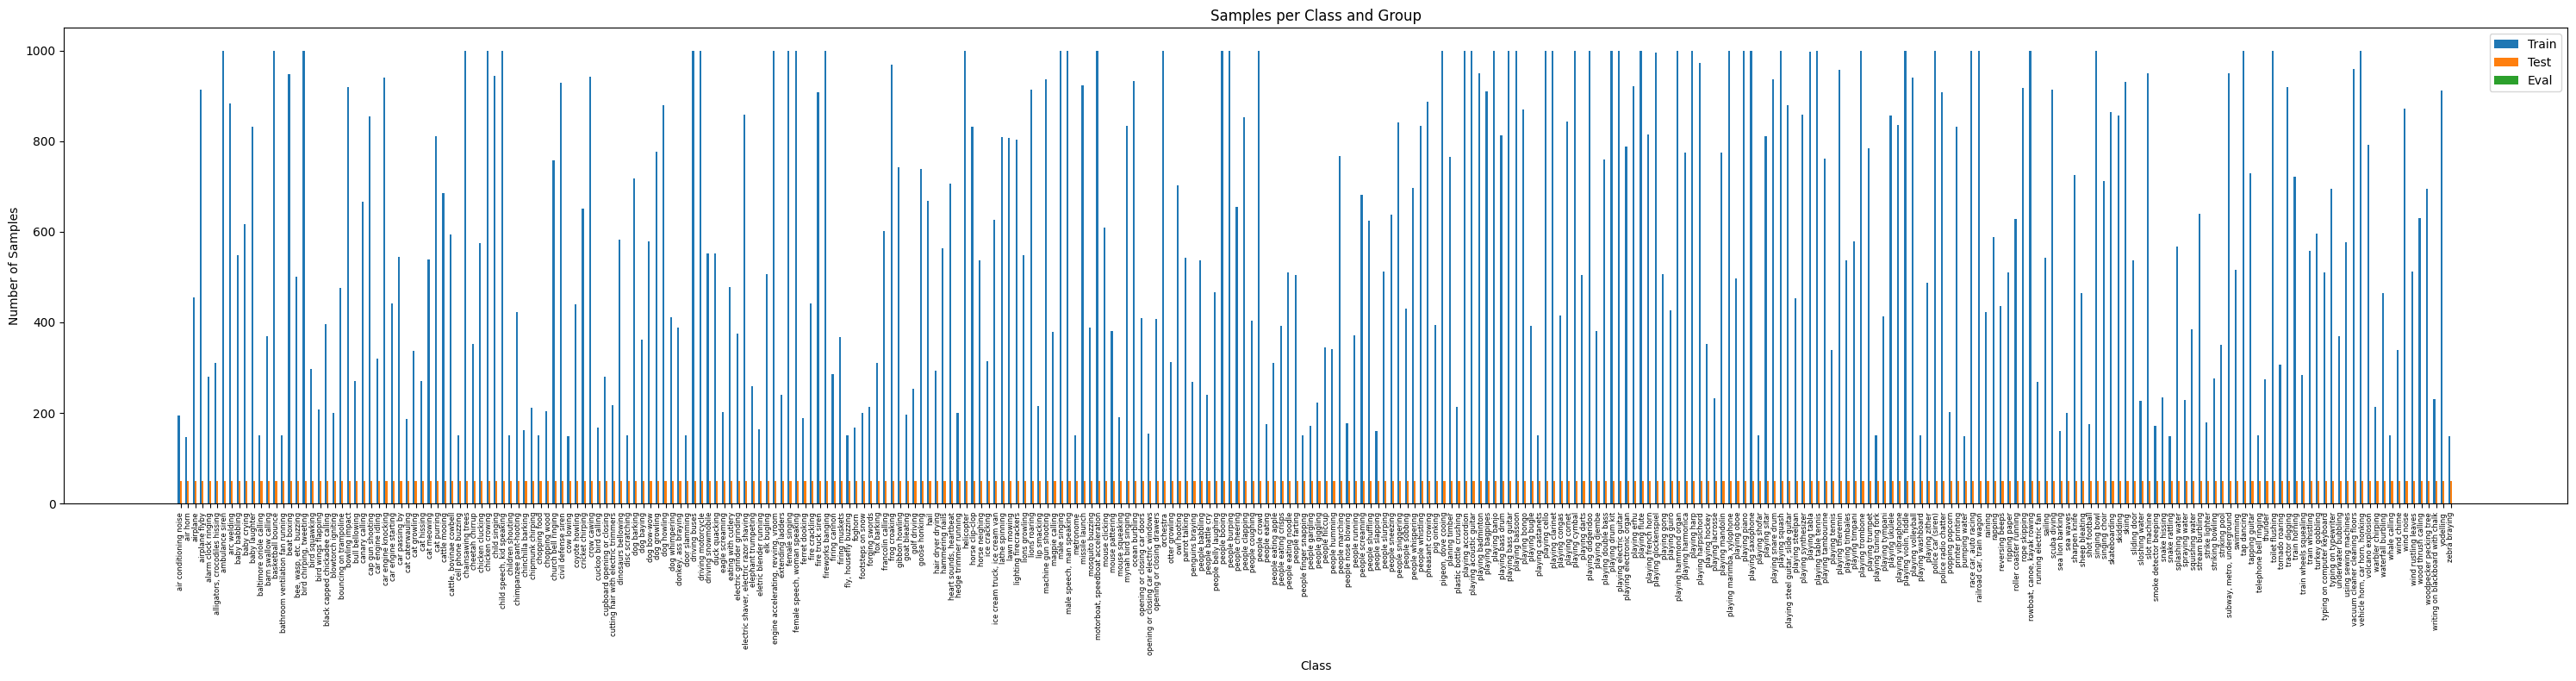

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data: count samples for each (class, group_name) pair
pivot = original_dataset.pivot_table(index='class', columns='group_name', aggfunc='size', fill_value=0)

# Ensure all group columns are present
for group in ['train', 'test', 'eval']:
    if group not in pivot.columns:
        pivot[group] = 0

pivot = pivot[['train', 'test', 'eval']]  # Ensure order

# Plotting
fig, ax = plt.subplots(figsize=(30, 8))  # Adjust width as needed for readability

x = np.arange(len(pivot.index))  # the label locations
width = 0.25  # the width of the bars

rects1 = ax.bar(x - width, pivot['train'], width, label='Train')
rects2 = ax.bar(x,        pivot['test'],  width, label='Test')
rects3 = ax.bar(x + width, pivot['eval'], width, label='Eval')

# Add labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Number of Samples')
ax.set_title('Samples per Class and Group')
ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=90, fontsize=6)  # Smaller font for many classes
ax.legend()

plt.tight_layout()
plt.show()

# Creation of personalized dataset

## Parameters definition

In [ ]:
original_dataset_path = '/work/com-304/SAGA/cache/vggsound.csv'
new_dataset_name = 'label2audio'
tokens_root = '/work/com-304/SAGA/tokens_16_05'

In [68]:
new_dataset = pd.read_csv(original_dataset_path)

## Data processing

In [ ]:
import os
import pandas as pd

# Parameters
modality = 'tok_audio@24_000'  # Change to any modality you want to check

# Gather all available tokenized files for each group
available_files = set()
for group in ['train', 'test', 'eval']:
    modality_dir = os.path.join(tokens_root, group, modality)
    if not os.path.isdir(modality_dir):
        continue
    files = [f for f in os.listdir(modality_dir) if f.endswith('.npy')]
    stems = [os.path.splitext(f)[0] for f in files]
    available_files.update(stems)

# Filter DataFrame to only keep rows where video_clip_name is in available_files
new_dataset = new_dataset[new_dataset['video_clip_name'].isin(available_files)].reset_index(drop=True)

print(f"Original CSV rows: {len(original_dataset)}")
print(f"Filtered CSV rows: {len(new_dataset)}")
new_dataset.head()

## Dataset statistics

In [70]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199467 entries, 0 to 199466
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   video_clip_name  199467 non-null  object
 1   timestamp        199467 non-null  int64 
 2   class            199467 non-null  object
 3   group_name       199467 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.1+ MB


In [71]:
print("Classes distribution")
new_dataset['class'].value_counts().reset_index()

Classes distribution


,class,count
0,fireworks banging,1050
1,tap dancing,1050
2,"motorboat, speedboat acceleration",1050
3,playing trombone,1050
4,playing drum kit,1050
...,...,...
305,snake rattling,199
306,zebra braying,199
307,playing castanets,199
308,cow lowing,199


In [72]:
print("Group distribution:")
stat = new_dataset['group_name'].value_counts().reset_index()
stat['percentage'] = (stat['count'] / len(new_dataset) * 100).round(2)
stat

Group distribution:


,group_name,count,percentage
0,train,183971,92.23
1,test,15496,7.77


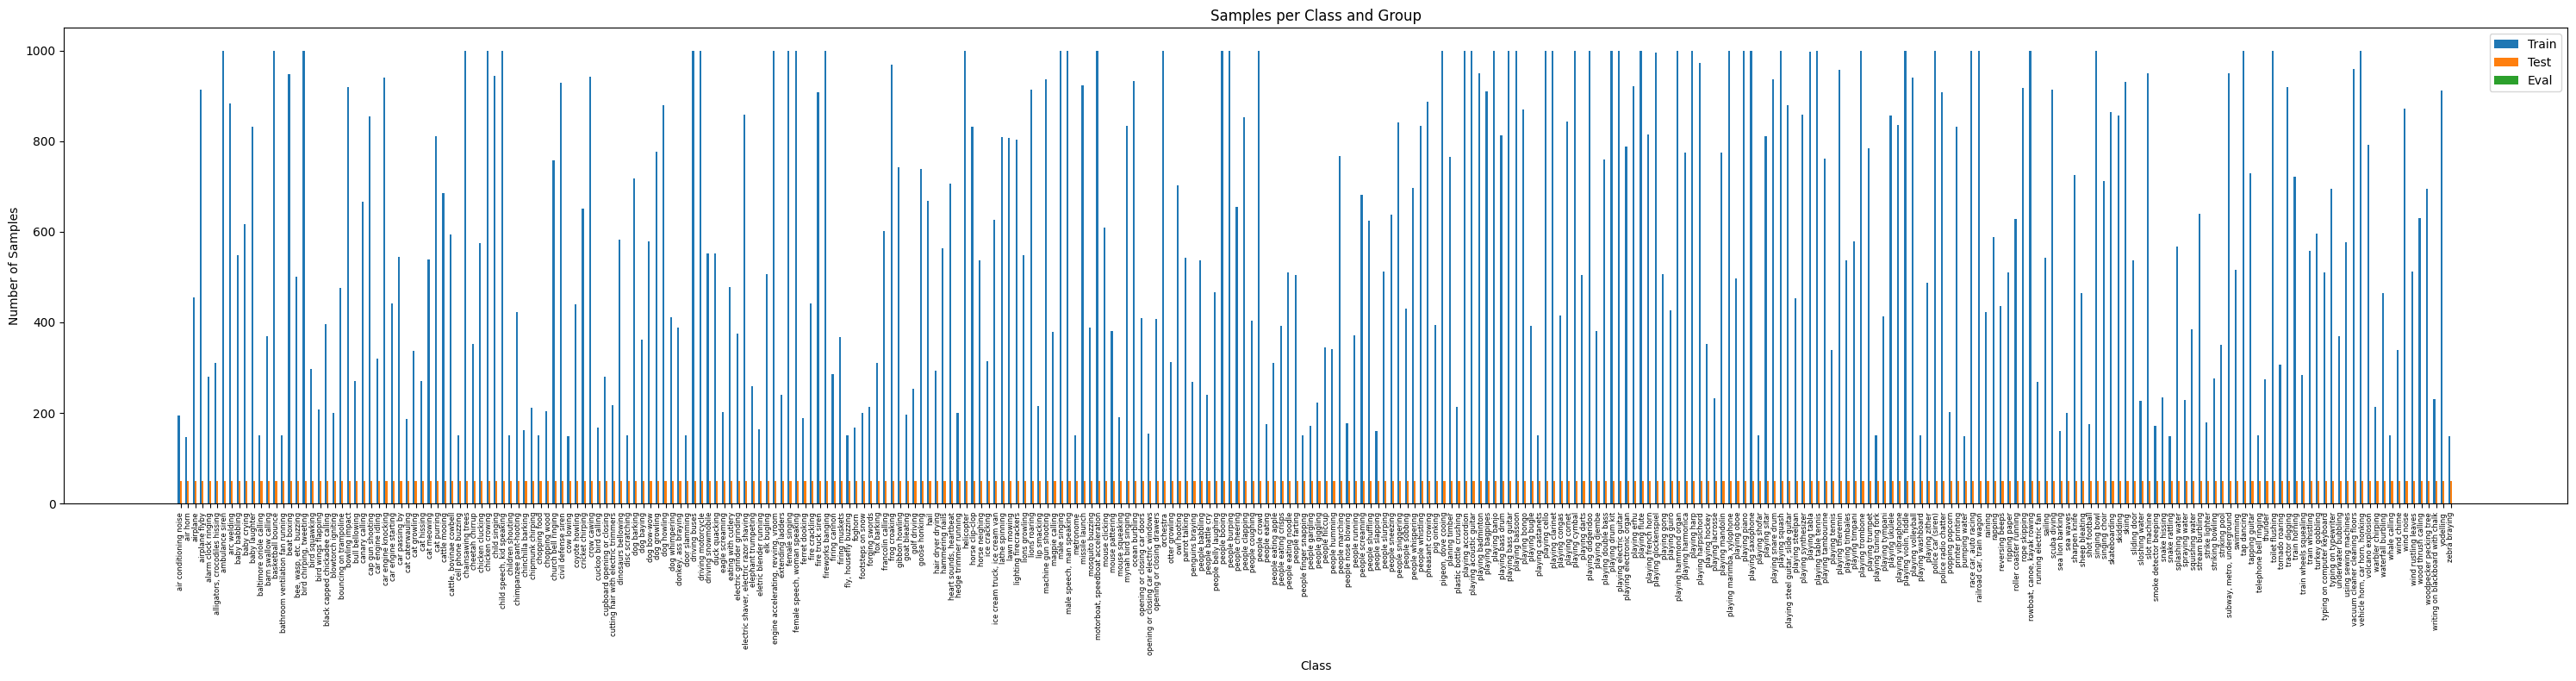

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data: count samples for each (class, group_name) pair
pivot = new_dataset.pivot_table(index='class', columns='group_name', aggfunc='size', fill_value=0)

# Ensure all group columns are present
for group in ['train', 'test', 'eval']:
    if group not in pivot.columns:
        pivot[group] = 0

pivot = pivot[['train', 'test', 'eval']]  # Ensure order

# Plotting
fig, ax = plt.subplots(figsize=(30, 8))  # Adjust width as needed for readability

x = np.arange(len(pivot.index))  # the label locations
width = 0.25  # the width of the bars

rects1 = ax.bar(x - width, pivot['train'], width, label='Train')
rects2 = ax.bar(x,        pivot['test'],  width, label='Test')
rects3 = ax.bar(x + width, pivot['eval'], width, label='Eval')

# Add labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Number of Samples')
ax.set_title('Samples per Class and Group')
ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=90, fontsize=6)  # Smaller font for many classes
ax.legend()

plt.tight_layout()
plt.show()

## Save dataset

### Save CSV

In [77]:
from datetime import datetime
filename = f"{new_dataset_name}_{datetime.now().strftime('%Y-%m-%d_%H-%M')}.csv"
new_dataset.to_csv(filename, index=False)

### Save tokens

In [ ]:
from select_tokens import organize_files

csv_path = filename
source_dir = "/work/com-304/SAGA/tokens_16_05"  # Adjust this to your source directory
dest_dir = f"/work/com-304/SAGA/tokens_{datetime.now().strftime('%Y-%m-%d_%H-%M')}"  # Adjust this to your desired destination

# Execute organization
organize_files(csv_path, source_dir, dest_dir)
new_dataset.to_csv(f"{dest_dir}/dataset.csv", index=False)